<a href="https://colab.research.google.com/github/brendauemura/Contador-de-nucleotideos-/blob/main/AlgoBio_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.3/276.3 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 69.0 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
from Bio.SeqUtils import MeltingTemp 
import matplotlib.pyplot as plt

In [ ]:
n_sequencias = []

seq = SeqIO.parse(open('SeqInfluenza.fasta'),'fasta') #abre o arquivo
for seq_record in seq:
    sequence = seq_record.seq
    nucleotide_count = len(sequence)
    a = sequence.count("A")
    t = sequence.count("T")
    c = sequence.count("C")
    g = sequence.count("G")
    gc = g+c
    tm = MeltingTemp.Tm_GC(sequence)
    total = a + t + c + g
    n_sequencias.append(seq_record.id)
    print("Sequência:", seq_record.id)
    print("Total de nucleotídeos:", total)
    print("Número de A:", a)
    print("Número de T:", t)
    print("Número de C:", c)
    print("Número de G:", g)
    print("Conteúdo GC:", gc)
    print("Temp Anelamneto (°C):", tm, "\n")
    print("Número de sequências de DNA:", len(n_sequencias))

Sequência: NC_007373.1
Total de nucleotídeos: 2341
Número de A: 810
Número de T: 536
Número de C: 425
Número de G: 570
Conteúdo GC: 995
Temp Anelamneto (°C): 77.07291488701422 

Número de sequências de DNA: 1
Sequência: NC_007372.1
Total de nucleotídeos: 2341
Número de A: 831
Número de T: 521
Número de C: 460
Número de G: 529
Conteúdo GC: 989
Temp Anelamneto (°C): 76.9678315892782 

Número de sequências de DNA: 2
Sequência: NC_007371.1
Total de nucleotídeos: 2233
Número de A: 761
Número de T: 541
Número de C: 418
Número de G: 513
Conteúdo GC: 931
Temp Anelamneto (°C): 76.72824913870429 

Número de sequências de DNA: 3
Sequência: NC_007366.1
Total de nucleotídeos: 1762
Número de A: 600
Número de T: 422
Número de C: 353
Número de G: 387
Conteúdo GC: 740
Temp Anelamneto (°C): 76.78144917753977 

Número de sequências de DNA: 4
Sequência: NC_007369.1
Total de nucleotídeos: 1566
Número de A: 515
Número de T: 334
Número de C: 303
Número de G: 414
Conteúdo GC: 717
Temp Anelamneto (°C): 78.2917

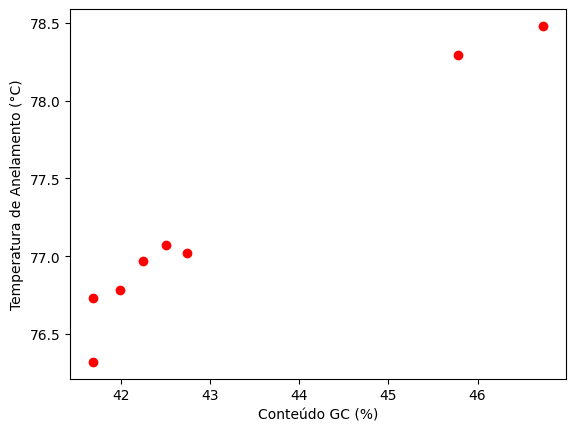

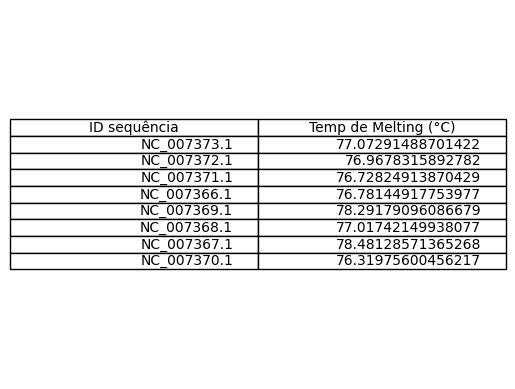

In [ ]:
# criar listas para armazenar os valores de GC e temperatura de anelamento
gc_content_list = []
tm_list = []

# para cada sequência, adicionar o conteúdo GC e a temperatura de anelamento às listas
seq = SeqIO.parse(open('SeqInfluenza.fasta'),'fasta') #abre o arquivo
for seq_record in seq:
    sequence = seq_record.seq
    gc_content = gc_fraction(sequence) * 100
    tm = MeltingTemp.Tm_GC(sequence)
    gc_content_list.append(gc_content)
    tm_list.append(tm)

# plotar o gráfico
plt.plot(gc_content_list, tm_list, 'ro')
plt.xlabel('Conteúdo GC (%)')
plt.ylabel('Temperatura de Anelamento (°C)')
fig, tabela = plt.subplots() #plotar tabela de temp de melting
tm1_list = []
final_data = []
seq = SeqIO.parse(open('SeqInfluenza.fasta'),'fasta') #abre o arquivo
for seq_record in seq:
    sequence = seq_record.seq
    tm1 = MeltingTemp.Tm_GC(sequence)
    tm1_list.append(tm1)
i = 0
while i != len(n_sequencias):
    final_data.insert(i, [n_sequencias[i], tm1_list[i]])
    i = i + 1
colunas_tabela = ["ID sequência", "Temp de Melting (°C)"]
tabela.axis("tight")
tabela.axis("off")
tabela.table(cellText = final_data, colLabels = colunas_tabela, loc = "center")
plt.show()

In [ ]:
 seq = SeqIO.parse(open('SeqInfluenza.fasta'),'fasta') #abre o arquivo
for i, getRecord in enumerate(seq):        #loop que separa as sequencias e enumera cada uma 
  print("sequencia:", i+1)
  print(getRecord.seq)

sequencia: 1
AGCAAAAGCAGGTCAATTATATTCAGTATGGAAAGAATAAAAGAACTACGGAACCTGATGTCGCAGTCTCGCACTCGCGAGATACTGACAAAAACCACAGTGGACCATATGGCCATAATTAAGAAGTACACATCGGGGAGACAGGAAAAGAACCCGTCACTTAGGATGAAATGGATGATGGCAATGAAATACCCAATCACTGCTGACAAAAGGATAACAGAAATGGTTCCGGAGAGAAATGAACAAGGACAAACTCTATGGAGTAAAATGAGTGATGCTGGATCAGATCGAGTGATGGTATCACCTTTGGCTGTAACATGGTGGAATAGAAATGGACCCGTGGCAAGTACGGTCCATTACCCAAAAGTATACAAGACTTATTTTGACAAAGTCGAAAGGTTAAAACATGGAACCTTTGGCCCTGTTCATTTTAGAAATCAAGTCAAGATACGCAGAAGAGTAGACATAAACCCTGGTCATGCAGACCTCAGTGCCAAAGAGGCACAAGATGTAATTATGGAAGTTGTTTTTCCCAATGAAGTGGGAGCCAGGATACTAACATCAGAATCGCAATTAACAATAACTAAAGAGAAAAAAGAAGAACTCCGAGATTGCAAAATTTCTCCCTTGATGGTTGCATACATGTTAGAGAGAGAACTTGTCCGAAAAACAAGATTTCTCCCAGTTGCTGGCGGAACAAGCAGTATATACATTGAAGTCTTACATTTGACTCAAGGAACGTGTTGGGAACAAATGTACACTCCAGGTGGAGAAGTGAGGAATGACGATGTTGACCAAAGCCTAATTATTGCGGCCAGGAACATAGTAAGAAGAGCTGCAGTATCAGCAGATCCACTAGCATCTTTATTGGAGATGTGCCACAGCACACAAATTGGCGGGACAAGGATGGTGGACATTCTTAGACAGAACCCGACTGAAGAACAAGCTGTGGATATATGCAAGGCTGCAATGGGATTGAGAATCAGC